# Lab 7: Numerical integration


**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name:    **YOUR NAME HERE**
* SID:     **YOUR STUDENT NUMBER**


## Numerical integration

In this lab we will investigate numerical integration methods. We’ll start with the simple trapezoid and Simpson’s rules, with which you may be familiar from your maths study, and move on to the more sophisticated *Gaussian quadrature*.

Recall that our general rule for numerical integration is
$$
\int_a^b f(x)\,\mathrm{d}x \approx (b-a)\sum_{i=1}^N w_if(x_i)
$$
for suitable weights $w_i$ and places $x_i$ to evaluate the function. For the trapezoid and Simpson's rule calculations, the $x_i$ must be evenly spaced; we'll denote the spacing between them by $h$. Then the input to our python function will be a numpy array `d` containing $f(x_i)$. We will need to calculate a suitable weighting array `w` containing the $w_i$ values. Since array multiplication is componentwise, we can then simply calculate `d*w`. The sum is easily evaluated using the Python built-in `sum` function.

For the trapezoid rule, the weights array should be
$$
w = \tfrac1N\times(\tfrac12, 1, 1, \dots, 1, \tfrac12).
$$
Rewriting the integral in a more convenient form, we have
$$
\int_a^b f(x)\,\mathrm{d}x \approx h\sum_{i=1}^N v_if(x_i)
$$
with
$$
v = (\tfrac12, 1, 1, \dots, 1, \tfrac12).
$$


To compute the integral in this way we will need to construct the weighting arrays.  Here it is useful to review some of the properties of `numpy` arrays and the ways they can be manipulated and sliced.

### Python Interlude - a brief introduction to numpy arrays and slicing

First we import several helper functions from `numpy`.

In [1]:
from numpy import ones, array, empty, zeros

In [2]:
npt=5
a = ones(npt)  # creates an array of length (n) , each element has value 1
print(a)


[1. 1. 1. 1. 1.]


The behaviour of `zeros` is similar.  Review the documentation for these functions (e.g., open a cell and execute `?zeros`).

In [3]:
b = zeros(npt)
print(b)

[0. 0. 0. 0. 0.]


**Slicing**

Recall that basic slicing is constructed by start:stop:step notation inside of brackets.  The basic slice syntax is `i:j:k` where `i` is the starting index, `j` is the stopping index, and `k` is the step.  For example,

In [4]:
x = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[1:7:2]  # start at index one, stop at 7 and use a step of 2.   Note the endpoint is not a part of the slice.


array([1, 3, 5])

Slicing syntax can be a useful way to access particular subset of elements in an array and manipulate them.

A particularly useful slicing syntax is to use `::` to indicate all remaining elements along the dimension of the array.  When combined with a step interval this can be useful for setting up arrays in this lab script.

Try to predict the outcome of the following cells.  Then execute the cells.

In [5]:
x[::2]

array([0, 2, 4, 6, 8])

In [6]:
x[1::2]

array([1, 3, 5, 7, 9])

In [7]:
x[1::2] = 66
print([x])

[array([ 0, 66,  2, 66,  4, 66,  6, 66,  8, 66])]


**Componentwise operations**

Arithmetic array operations are done in a componentwise fashion.

In [8]:
x = array([0,1,2,3,4,5])
print(x+x)

[ 0  2  4  6  8 10]


In [9]:
print(x*x)

[ 0  1  4  9 16 25]


We can find the number of elements in an array using the `size` attribute.

In [10]:
n = x.size
print(n)

6


We can use this to manipulate the last element in an array.  For example,

In [11]:
x=array([0,1,2,3,4,5,6,7,8,9])
n = x.size
print(x[0])
print(x[n-1])
x[n-1]=0

0
9



Finally `sum()` is a useful function for computing the sum of array elements.


In [12]:
x=array([0,1,2,3,4])
print(sum(x))
print(sum(x*x))

10
30




**Write a Python function `trapezoid(d, h)` that returns the estimated integral over the points `d` (in the notation above), using the trapezoid rule.**


You will need to construct an appropriate weighting array $v$.  The slicing and indexing reviewed above may be useful.

∫ab​f(x)dx≈hi=1∑N​vi​f(xi​)

In [13]:
from numpy import linspace, logspace, cos, pi, exp, sqrt, linspace

In [14]:
def trapezoid(d, h):
    """Integrate d using the trapezoid rule and return the value of the integral
    
    d: array of data points evaluated at even spacing h
    h: spacing between data points
    
    """
    v = ones(d.size)
    v[0] = v[v.size-1] = 0.5
    return h*sum(d*v)

To test your function, we’ll calculate $\int_0^{\pi/2}\cos(x)\,\mathrm{d}x = 1$.

In [15]:
x = linspace(0, pi/2, 100)
y = cos(x)
print(trapezoid(y, x[1] - x[0]))

0.999979020750832


Assuming that the answer you got above was close to 1, **write a loop to repeat the same calculation with the number $N$ of steps varying from $10$ to $10^7$. Report the error for each step size.**

*Hint:* remember that `logspace` from the `numpy` module is an easy way of calculating a range of values that increase (or decrease) by a constant factor. If you’re not sure how to use this, try evaluating `logspace(1, 7, 7)`.

*Hint:* You can get a large and *odd* number by using `steps = logspace(1,7,1)+1`.  This may come in handy using Simpson's rule later in the script.

In [16]:
for i in range(1,8):
    x = linspace(0, pi/2, 10**i)
    y = cos(x)
    print(1-trapezoid(y, x[1] - x[0]),trapezoid(y, x[1] - x[0]))

0.0025397682082740625 0.9974602317917259
2.0979249167996095e-05 0.999979020750832
2.0602861861007682e-07 0.9999997939713814
2.0565779079717572e-09 0.9999999979434221


2.0581758519711002e-11 0.9999999999794182


1.8884893648873913e-13 0.9999999999998112


-5.995204332975845e-14 1.00000000000006


▶ **CHECKPOINT 1**

For Simpson’s rule, on the other hand, the weights array should be
$$
v = \tfrac13\times(1, 4, 2, 4, 2, \dots, 4, 2, 4, 1).
$$

**Write a Python function `simpson(d, h)` that works in the same way to calculate an integral using Simpson’s rule.**

Note that because Simpson's rule combines contributions from adjacent intervals it must be used with an even number of intervals (and the minimum number of intervals is 2).  In terms of points, Simpson's rule must use an odd number of points (>3).  Can you see why this is the case from the above?

Hint:  Your Simpson's rule function cannot give a correct result without setting up the weighting function properly.  It may be useful to open a few cells to make the weighting function arrays for a modest number of elements first by hand to ensure you've got the syntax and setup correct.

Hint: **It is recommended that your function check that the array inputs have the right number of points (the number of points must be odd and at least 3).**  Your code might execute, but will give incorrect results if this is not the case.

In [17]:
d=array([0,1,2,3,4,5,6,7,8,9,10])
v = ones(d.size)
v[1:d.size:2] = 4
v[2:d.size-1:2] = 2
print(v)
v = v * 1/3


[1. 4. 2. 4. 2. 4. 2. 4. 2. 4. 1.]


In [18]:
def simpson(d,h):
    if d.size % 2 != 0:
        v = ones(d.size)
        v[1:d.size:2] = 4
        v[2:d.size-1:2] = 2
        v = v * 1/3
        return h*sum(d*v)
    elif d.size % 2 == 0:
        print('oogabooga amount of numbers')
    else:
        print('congratz you either used 0 or invented a number')

**Repeat the loop from above, again reporting the error at each step size.** Is Simpson’s rule better or worse than the trapezoid rule in evaluating this integral?

In [19]:
for i in range(1,8):
    x = linspace(0, pi/2, (10**i)+1)
    y = cos(x)
    print(simpson(y, x[1] - x[0]))

1.0000033922209006
1.0000000003382359
1.000000000000032
0.999999999999999
1.0000000000000009


1.0000000000000264


1.0000000000000642


In the same way as we did for the differentiation algorithms, **plot on the same log-log axes the error against the step size for these two algorithms.** Comment on the shape of these graphs.

[3.3922209006220783e-06, 3.3823588374559677e-10, 3.197442310920451e-14, 9.992007221626409e-16, 8.881784197001252e-16, 2.6423307986078726e-14, 6.417089082333405e-14]
[0.0025397682082740625, 2.0979249167996095e-05, 2.0602861861007682e-07, 2.0565779079717572e-09, 2.0581758519711002e-11, 1.8884893648873913e-13, 5.995204332975845e-14]


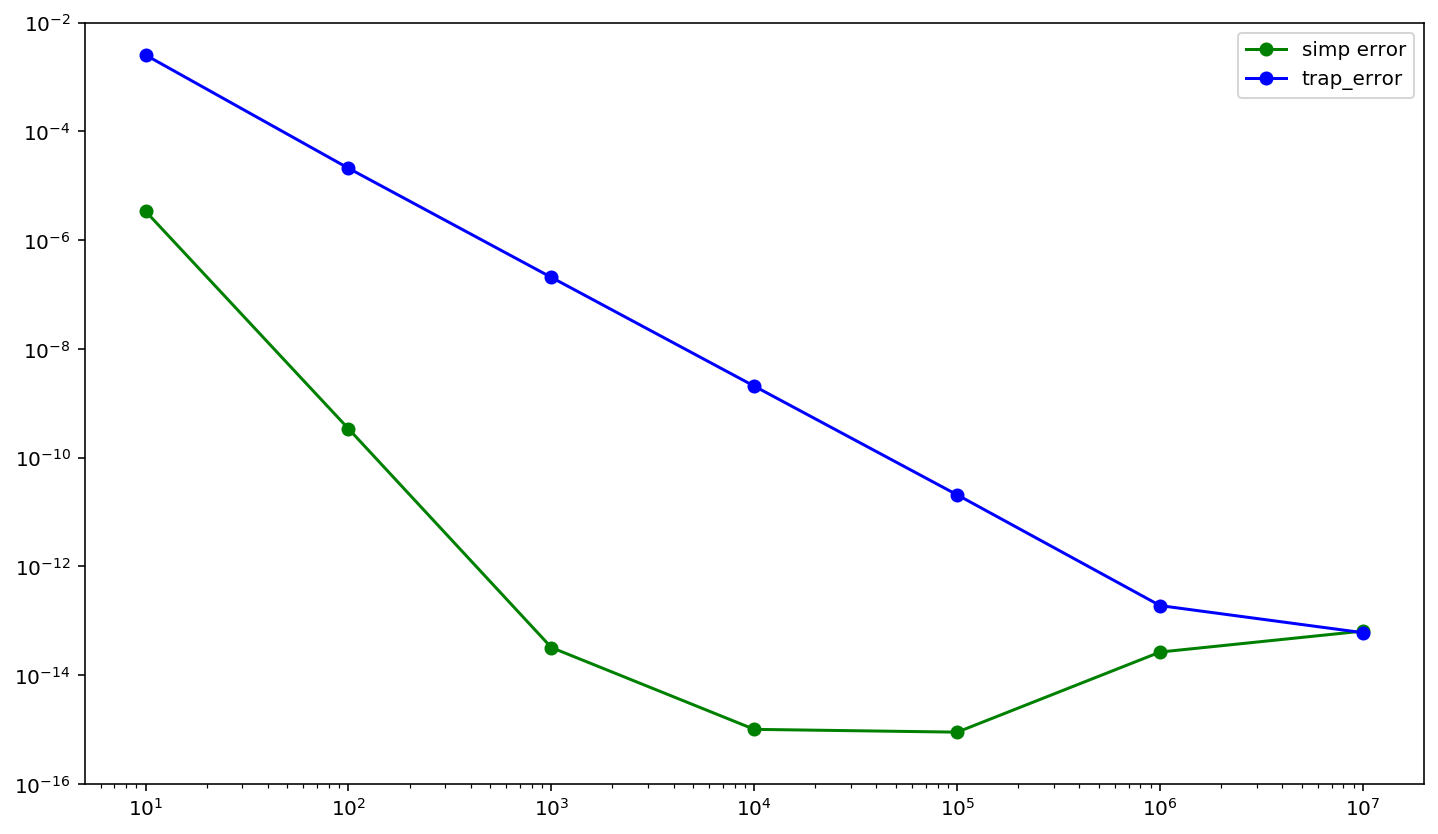

In [20]:
from pylab import loglog, xlabel, ylabel, title, legend, figure, ylim
from numpy import linspace, logspace, cos, pi, exp, sqrt, linspace
# %matplotlib inline
figure()

trap_error = []
simp_error = []

for i in range(1,8):
    x = linspace(0, pi/2, (10**i))
    y = cos(x)
    trap_error.append(abs(1-trapezoid(y, x[1] - x[0])))

for i in range(1,8):
    x = linspace(0, pi/2, (10**i)+1)
    y = cos(x)
    simp_error.append(abs(1-simpson(y, x[1] - x[0])))

print(simp_error)
print(trap_error)
n = logspace(1,7,7)
ylim(10**-16,10**-2,12)
loglog(n,simp_error,'go-',label='simp error')
loglog(n,trap_error,'bo-',label='trap_error')
legend()

**Repeat the same calculations** (*i.e.*, calculate the error for a range of step sizes) **for the integral**
$$
\int_0^1 \exp(-x)\,\mathrm{d}x = 1 - e^{-1}.
$$
Are your results consistent with the cosine integral from the previous part? **Make a similar figure.**

[3.5076045756810004e-07, 3.5117464491918327e-11, 2.886579864025407e-15, 1.1102230246251565e-15, 5.773159728050814e-15, 4.884981308350689e-15, 3.4416913763379853e-15]
[0.0006501960196403367, 5.374617249254143e-06, 5.278222414695222e-08, 5.268762093280088e-10, 5.2698956309882306e-12, 2.842170943040401e-14, 6.328271240363392e-15]


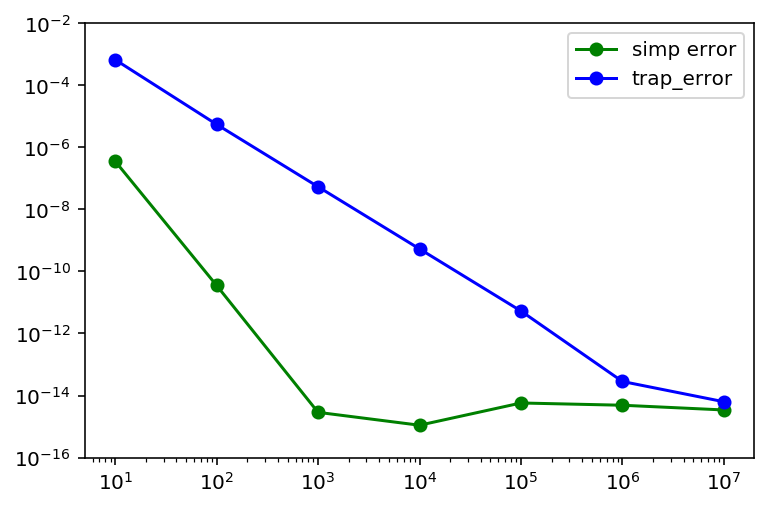

In [21]:
from pylab import loglog, xlabel, ylabel, title, legend, figure
%matplotlib inline
figure()

trap_error = []
simp_error = []

for i in range(1,8):
    x = linspace(0,1,10**i)
    y = exp(-x)
    trap_error.append((abs(1-exp(-1)-trapezoid(y,x[1]-x[0]))))

for i in range(1,8):
    x = linspace(0,1,(10**i)+1)
    y = exp(-x)
    simp_error.append((abs(1-exp(-1)-simpson(y,x[1]-x[0]))))

print(simp_error)
print(trap_error)
n = logspace(1,7,7)
ylim(10**-16,10**-2,12)
loglog(n,simp_error,'go-',label='simp error')
loglog(n,trap_error,'bo-',label='trap_error')
legend()

▶ **CHECKPOINT 2**

## Gaussian quadrature

As discussed in the lecture, slides and reading, a more sophisticated method is Gaussian quadrature. We will explore this briefly using our own code, but then move to using precompiled Fortran code provided by the `scipy` package to implement this method.

For two-point Gaussian quadrature from $a$ to $b$, the $x$ values should be
$$
x = a + \left(\frac12 \pm \frac{1}{2\sqrt{3}}\right)(b - a)
$$
each point should have weight $w_i = \frac12$.

**Use two-point Gaussian quadrature to evaluate the same two integrals, $\int_0^{\pi/2}\cos(x)\,\mathrm dx$ and $\int_0^1 \exp(-x)\,\mathrm{d}x$. How close do you get to the correct answers?**

In [22]:
from pylab import loglog, xlabel, ylabel, title, legend, figure, ylim
from numpy import linspace, logspace, cos, pi, exp, sqrt, linspace

def f(x):
    return cos(x)

def g(x):
    return exp(-x)

def gauss_cos(a,b):
    c1 = c2 = (b-a)/2
    x1 = a + ( 1/2 + 1/(2*sqrt(3)))  * (b - a)
    x2 = a + ( 1/2 - 1/(2*sqrt(3)))  * (b - a)
    return c1*f(x1) + c2*f(x2)

def gauss_e(a,b):
    c1 = c2 = (b-a)/2
    x1 = a + ( 1/2 + 1/(2*sqrt(3)))  * (b - a)
    x2 = a + ( 1/2 - 1/(2*sqrt(3)))  * (b - a)
    return (c1*g(x1) + c2*g(x2))

print(1-gauss_cos(0,pi/2),gauss_cos(0,pi/2))
print((1-exp(-1))-gauss_e(0,1),gauss_e(0,1))

0.0015273865958849164 0.9984726134041151
0.00014179929671220837 0.6319787595318455


Now **Import the `quad` function** from the module `scipy.integrate`. **Use the help text** (remember that you can get this by typing `?quad` or `quad?` and evaluating the cell, or by typing `quad` and pressing `Shift`+`Tab`) to work out how to call this function. 

Note that we *don’t* get to choose how many points are evaluated, which will be either 15 or 21 in each subinterval depending on the exact function we use. The price of convenience is complexity!

**Evaluate the two integrals above once again** and compare the absolute error to the best values obtained by the methods we've discussed so far; to the estimate provided by `quad` itself; and to the machine epsilon.

In [23]:
from scipy.integrate import quad
x1 = lambda x: cos(x)
x2 = lambda x: exp(-x)

print(quad(x1,0,pi/2))
print(quad(x2,0,1))

(0.9999999999999999, 1.1102230246251564e-14)
(0.6321205588285578, 7.017947987503856e-15)


Signature:
quad(
    func,
    a,
    b,
    args=(),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
)
Docstring:
Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
    In the call

errors are roughly 1e-14 & 1e-15
lowest simp error for cos 8.881784197001252e-16
lowest trap error for cos 5.995204332975845e-14
lowest simp error for e 1.1102230246251565e-15
lowest trap error for e 6.328271240363392e-15

In [25]:
from sys import float_info
float_info.epsilon

2.220446049250313e-16

▶ **CHECKPOINT 3**

## Extension: the Romberg correction

We know that Simpson’s rule has an error proportional to $h^4$. Suppose we do two Simpson’s rule calculations, one with step size $h$ and result $S_1$ and another with step size $2h$ and result $S_2$. Then we expect $S_2$ to have $2^4 = 16$ times the error of $S_1$: if $I$ is the true integral, $I - S_2 = 16(I - S_1)$. This suggests a way of improving the calculation: we simply solve for $I$, giving
$$
I = \frac{16S_1 - S_2}{15}.
$$

**Repeat the calculation of errors in known integrals** using the Romberg rule to improve the calculation at each step size, and once again plotting the absolute error against the step size.

In [26]:
def romberg(d,h):
    return (16*simpson(d,h) - simpson(d,2*h))/15

for i in range(1,8):
    x = linspace(0, pi/2, (10**i)+1)
    y = cos(x)
    print(romberg(y, x[1] - x[0]))
    
for i in range(1,8):
    x = linspace(0, 1, (10**i)+1)
    y = exp(-x)
    print(romberg(y, x[1] - x[0]))

0.9333364994061739
0.9333333336490202
0.9333333333333632
0.9333333333333323
0.9333333333333341


0.933333333333358


0.9333333333333933
0.5899795156164143
0.5899791882727635
0.5899791882399898
0.5899791882399862
0.5899791882399817


0.5899791882399917


0.5899791882399839
